In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
mLoad = np.loadtxt('Example_0429.csv', dtype=int, delimiter=',')
nRow, nCol = mLoad.shape

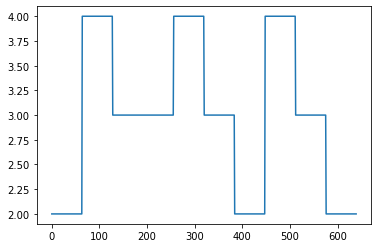

In [4]:
sumCol = np.sum(mLoad, axis=0)
plt.plot(sumCol)
plt.show()

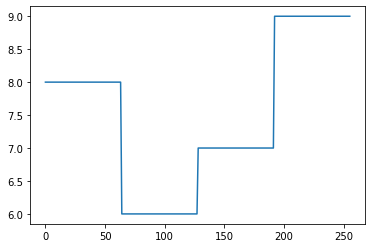

In [5]:
sumRow = np.sum(mLoad, axis=1)
plt.plot(sumRow)
plt.show()

In [ ]:
mLoad = np.loadtxt('Example_0430.csv', dtype=int, delimiter=',')
nRow, nCol = mLoad.shape

In [ ]:
sumCol = np.sum(mLoad, axis=0)
plt.plot(sumCol)
plt.show()

In [1]:
import numpy as np
from collections import Counter, defaultdict
import time
import copy
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def remove_node(G, target):
    del G[target]
    for nbrs in G.values():
        nbrs.discard(target)

def _unblock(thisnode, blocked, B):
    stack = set([thisnode])
    while stack:
        node = stack.pop()
        if node in blocked:
            blocked.remove(node)
            stack.update(B[node])
            B[node].clear()

def namesLists(G1, Row, Len):
    NamesLists = []
    NamesPaths = []
    G = copy.deepcopy(G1)
    for startnode in range(Row):
        path = [startnode]
        blocked = set()
        closed = set()
        blocked.add(startnode)
        B = defaultdict(set)
        stack = [(startnode, list(G[startnode]))]
        while stack:
            thisnode, nbrs = stack[-1]
            if nbrs:
                nextnode = nbrs.pop()
                canTran = nextnode not in blocked
                lenFalse = len(path) != Len
                if lenFalse and canTran:
                    path.append(nextnode)
                    stack.append((nextnode, list(G[nextnode])))
                    closed.discard(nextnode)
                    blocked.add(nextnode)
                    continue
                elif lenFalse == False:
                    if nextnode == startnode:
                        NamesPaths.append(path[:])
                        Names = path[:]
                        Names.sort()
                        if Names not in NamesLists:
                            NamesLists.append(Names)
                    closed.update(path)
            if not nbrs:
                if thisnode in closed:
                    _unblock(thisnode, blocked, B)
                else:
                    if thisnode in G:
                        for nbr in G[thisnode]:
                            if thisnode not in B[nbr]:
                                B[nbr].add(thisnode)
                stack.pop()
                path.pop()
        remove_node(G, startnode)
    return NamesLists, NamesPaths

In [3]:
mLoad = np.loadtxt('Example_0429.csv', dtype=int, delimiter=',')
nRow, nCol = mLoad.shape
G0 = defaultdict(set)
for i in range(nRow):
    for j in range(nCol):
        if mLoad[i][j] == 1:
            G0[i].add(j + nRow)
            G0[j + nRow].add(i)
num = 4
namesLists0, namesPaths0 = namesLists(G0, nRow, num)
print(num, len(namesLists0), len(namesPaths0))

4 64 128


In [4]:
def g2lineGs(partG, row):
    G1 = copy.deepcopy(partG)
    lineGs = [] # 线结构
    numLines = 0
    gps = defaultdict(int) # 定位
    for xStart in range(row): # 遍历部落1
        for yStart in list(G1[xStart]): # 遍历xStart的好友列表
            numLines +=1
            G1[xStart].discard(yStart)
            step = 1 # 线的长度
            while yStart+step in G1[xStart+step]:
                G1[xStart+step].discard(yStart+step) # 移除点, 避免线重复
                step += 1 #线长度递增
            lineGs.append([xStart, yStart, step, yStart-xStart]) # 保存线[起始X, 起始Y, 长度]
            for i in range(step):
                gps[xStart+i, yStart+i] = step - i
                gps[yStart+i, xStart+i] = step - i
    return lineGs, gps, numLines

In [5]:
partG0 = defaultdict(set)
for i in range(nRow):
    partG0[i] = G0[i]
lineGs0, Gps0, numLines0 = g2lineGs(partG0, nRow)

In [6]:
keyX0 = [Dia[0] for Dia in lineGs0]
keyX0 = list(set(keyX0))
keyX0.sort()
keyY0 = [Dia[1] for Dia in lineGs0]
keyY0 = list(set(keyY0))
keyY0.sort()

In [7]:
keyX0

[0,
 1,
 20,
 22,
 28,
 30,
 38,
 49,
 57,
 64,
 67,
 92,
 97,
 103,
 115,
 116,
 128,
 137,
 141,
 149,
 162,
 165,
 168,
 180,
 192,
 202,
 208,
 214,
 226,
 227,
 230,
 232,
 240,
 245]

In [8]:
keyY0

[256,
 287,
 304,
 320,
 335,
 336,
 344,
 381,
 384,
 395,
 410,
 414,
 448,
 460,
 478,
 492,
 512,
 546,
 548,
 554,
 563,
 576,
 605,
 631,
 639,
 640,
 666,
 682,
 704,
 729,
 731,
 740,
 758,
 768,
 781,
 792,
 811,
 832,
 839,
 844]

In [ ]:
for i in range(len(namesLists0)):
    